In [ ]:
# Goal
# Train the model from the training data and save the model in the local drive (do this once only).

In [ ]:
# file needed: (all in csv format)
# training data set

In [113]:
# Pandas is the python's best library for handling dataframe objects
import pandas as pd

In [114]:
# Import the training data
df = pd.read_csv('jl.email_training_data.08132019.csv')

In [120]:
print(df.shape) # dimensions
print(df.columns.values) # column namess
print(df.dtypes) # dtypes
df.head(5) 

(2401, 9)
['quality2' 'top' 'teleph' 'email.domain' 'email.name' 'NumberedEmail'
 'MD' 'DR' 'DOC']
quality2         object
top              object
teleph             bool
email.domain     object
email.name       object
NumberedEmail      bool
MD                 bool
DR                 bool
DOC                bool
dtype: object


,quality2,top,teleph,email.domain,email.name,NumberedEmail,MD,DR,DOC
0,Good,resident,True,edu,If.Fl,False,False,False,False
1,Good,resident,True,edu,no.name,False,False,False,False
2,Good,resident,True,etc,no.name,False,False,False,False
3,Good,resident,True,edu,If.Fl,False,False,False,False
4,Good,resident,True,gmail,no.name,True,False,False,False


In [121]:
# Change the data types so they are amenable to model
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(9): # 9 = the number of columns in df
    df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
df.head() # look at what changed to the df

,quality2,top,teleph,email.domain,email.name,NumberedEmail,MD,DR,DOC
0,1,5,1,4,3,0,0,0,0
1,1,5,1,4,7,0,0,0,0
2,1,5,1,5,7,0,0,0,0
3,1,5,1,4,3,0,0,0,0
4,1,5,1,6,7,1,0,0,0


In [122]:
# Split data into predictors and response
y=df.iloc[:,0]
x=df.iloc[:,1:]

In [123]:
# The most popular machine learning library for Python is sci-kit learn (sklearn)
# Train the Linear Discriminant Analysis (unfortunately, Flexible Discriminant Analysis not available in Python's sklearn)
# Linear Discriminant Analysis was also very competitive in terms of F-1 and balanced accuracy so I choose LDA here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(x,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [124]:
# The model selection was based on the train set (70% of data) in R out of thirteen classification models which were evaluated on the test set.
# Since I chose to go with LDA anyways, I utilize the entire data set to ingest as much information out of data as possible.
from sklearn.metrics import confusion_matrix
y_train_pred = lda.predict(x)
confusion_matrix(y,y_train_pred)

array([[ 153,  296],
       [ 151, 1801]], dtype=int64)

In [125]:
# Precision, recall, and F-1 score
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision: ' + str(precision_score(y,y_train_pred)))
print('recall: ' + str(recall_score(y,y_train_pred)))
print('f1: ' + str(f1_score(y,y_train_pred)))

precision: 0.8588459704339533
recall: 0.9226434426229508
f1: 0.8896023709557915


In [126]:
# second report
from sklearn.metrics import classification_report
target_names = ['Bad', 'Good']
print(classification_report(y, y_train_pred,target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.50      0.34      0.41       449
        Good       0.86      0.92      0.89      1952

   micro avg       0.81      0.81      0.81      2401
   macro avg       0.68      0.63      0.65      2401
weighted avg       0.79      0.81      0.80      2401



In [127]:
# Import the library for outputting plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

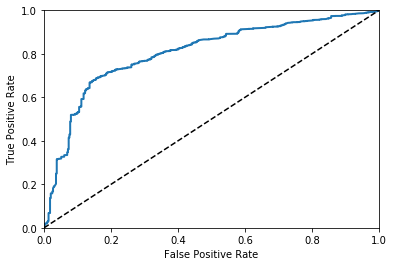

AUC: 0.8048041640804703


In [128]:
# ROC curve and AUC
y_scores = cross_val_predict(lda, x, y, cv=5, method='decision_function')
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()
from sklearn.metrics import roc_auc_score
print('AUC: ' + str(roc_auc_score(y,y_scores)))

In [129]:
# Save this model in the local drive so we don't have to train the model everytime we need to use
import pickle
pkl_filename = "lda.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)